# Delhi House Price EDA

.

.

.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('MagicBricks.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [4]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
df.isnull().sum()/df.shape[0]*100

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

In [6]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [7]:
df['Parking'] = df['Parking'].fillna(df['Parking'].mode()[0])

In [8]:
df.isnull().sum()/df.shape[0]*100

Area           0.000000
BHK            0.000000
Bathroom       0.158856
Furnishing     0.397141
Locality       0.000000
Parking        0.000000
Price          0.000000
Status         0.000000
Transaction    0.000000
Type           0.397141
Per_Sqft       0.000000
dtype: float64

In [9]:
df = df.dropna()

In [10]:
df.duplicated().sum()

82

In [11]:
df=df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1170 non-null   float64
 1   BHK          1170 non-null   int64  
 2   Bathroom     1170 non-null   float64
 3   Furnishing   1170 non-null   object 
 4   Locality     1170 non-null   object 
 5   Parking      1170 non-null   float64
 6   Price        1170 non-null   int64  
 7   Status       1170 non-null   object 
 8   Transaction  1170 non-null   object 
 9   Type         1170 non-null   object 
 10  Per_Sqft     1170 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 109.7+ KB


In [13]:
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       363
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       430
dtype: int64

In [14]:
df[['Parking','Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [15]:
df.Locality.value_counts().head(10)

Lajpat Nagar 3                                        32
Kailash Colony, Greater Kailash                       30
Yamuna Vihar, Shahdara                                29
Lajpat Nagar 2                                        29
J R Designers Floors, Rohini Sector 24                28
Mehrauli                                              24
Chittaranjan Park                                     24
Laxmi Nagar                                           23
Saket                                                 21
DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road    19
Name: Locality, dtype: int64

In [16]:
def local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(local)

In [17]:
df['Locality'].value_counts()

Other                 687
Lajpat Nagar           84
Dwarka Sector          72
Rohini Sector          71
Shahdara               71
Vasant Kunj            33
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Alaknanda              29
Name: Locality, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Area'>

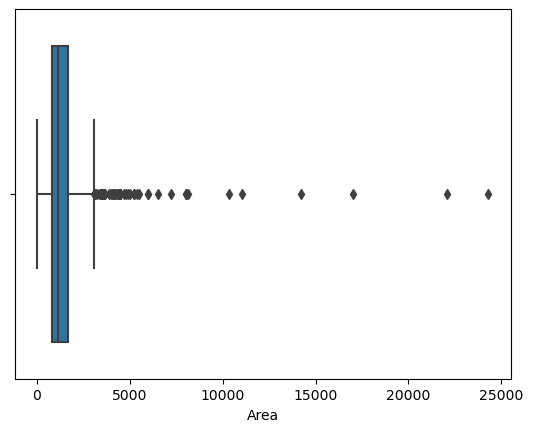

In [19]:
sns.boxplot(x='Area',data=df)

<Axes: xlabel='BHK'>

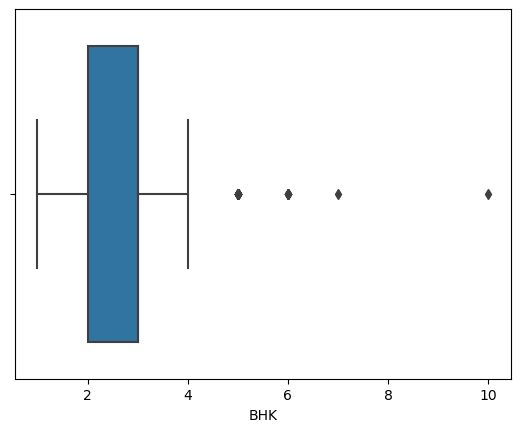

In [20]:
sns.boxplot(x='BHK',data=df)

<Axes: xlabel='Bathroom'>

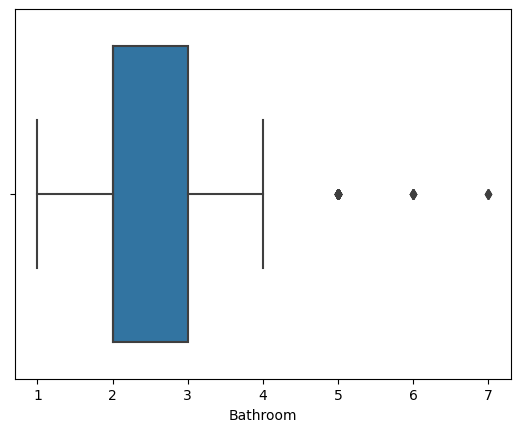

In [21]:
sns.boxplot(x='Bathroom',data=df)

In [22]:
# Using z-scores to remove outliers
from scipy import stats
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
df = df[(z<3).all(axis=1)]

<Axes: xlabel='Bathroom'>

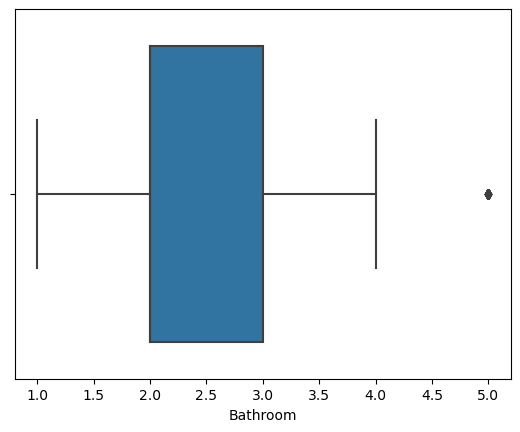

In [23]:
sns.boxplot(x='Bathroom',data=df)

<Axes: xlabel='BHK'>

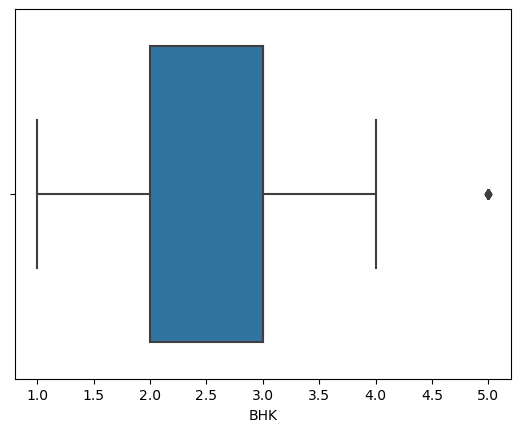

In [24]:
sns.boxplot(x='BHK',data=df)

<Axes: xlabel='Area'>

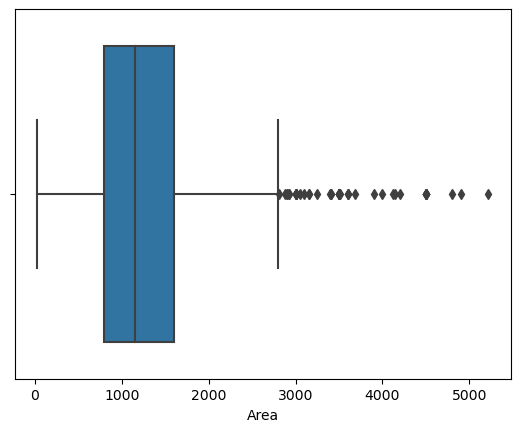

In [25]:
sns.boxplot(x='Area',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

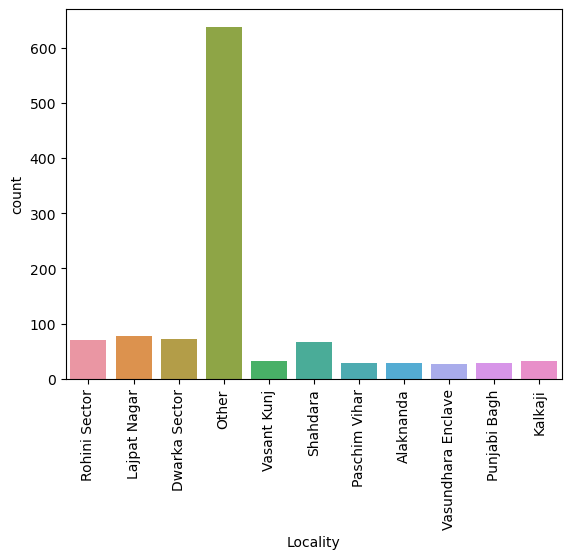

In [26]:
sns.countplot(x='Locality',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Area', ylabel='Count'>

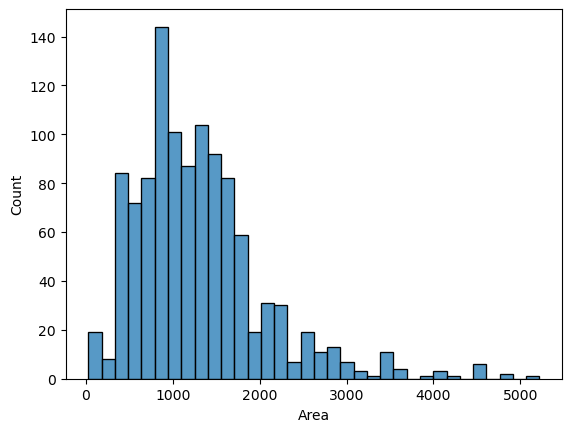

In [27]:
sns.histplot(x=df['Area'])

<Axes: xlabel='BHK', ylabel='count'>

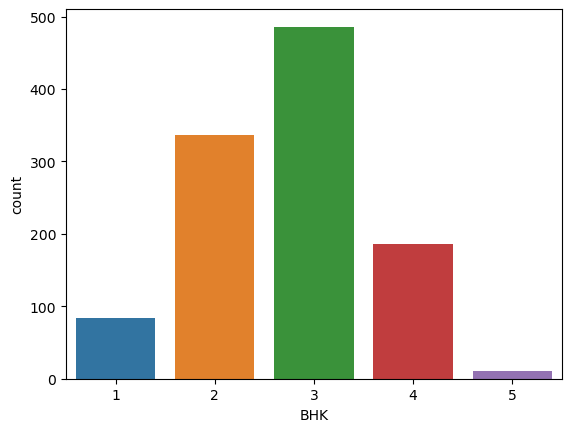

In [28]:
sns.countplot(x='BHK',data=df)

<Axes: xlabel='Type', ylabel='count'>

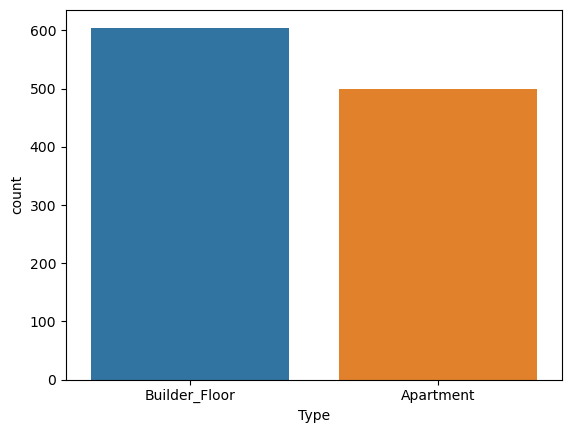

In [29]:
sns.countplot(x='Type',data=df)

<Axes: xlabel='Bathroom', ylabel='count'>

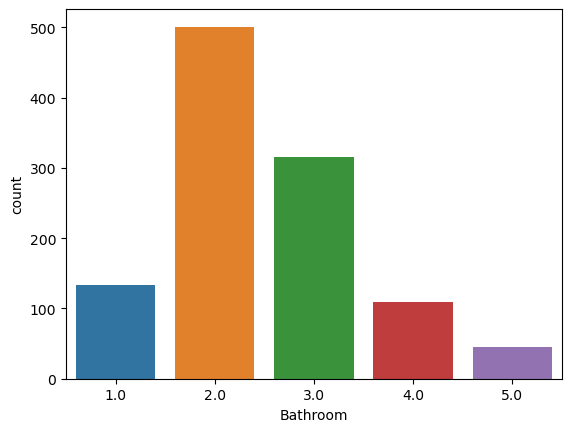

In [30]:
sns.countplot(x='Bathroom',data=df)

<Axes: xlabel='Furnishing', ylabel='count'>

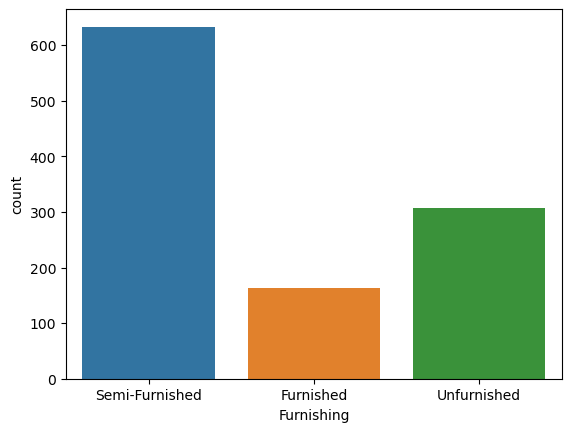

In [31]:
sns.countplot(x='Furnishing',data=df)

<Axes: xlabel='Parking', ylabel='count'>

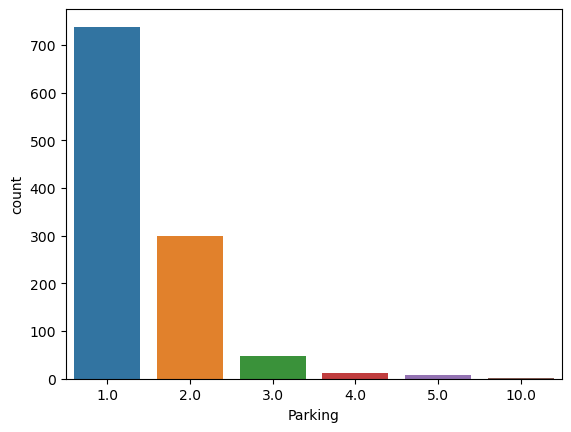

In [32]:
sns.countplot(x='Parking',data=df)

<Axes: xlabel='Status', ylabel='count'>

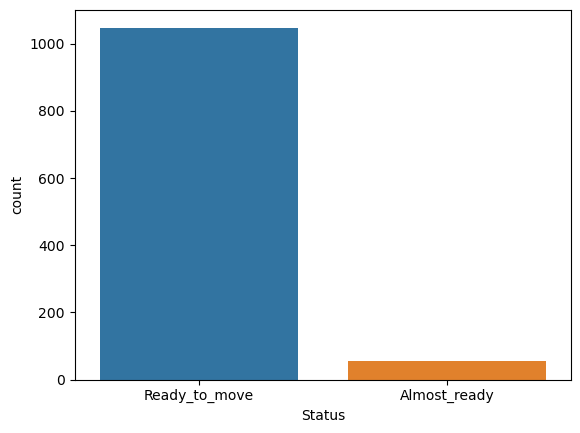

In [33]:
sns.countplot(x='Status',data=df)

<Axes: xlabel='Transaction', ylabel='count'>

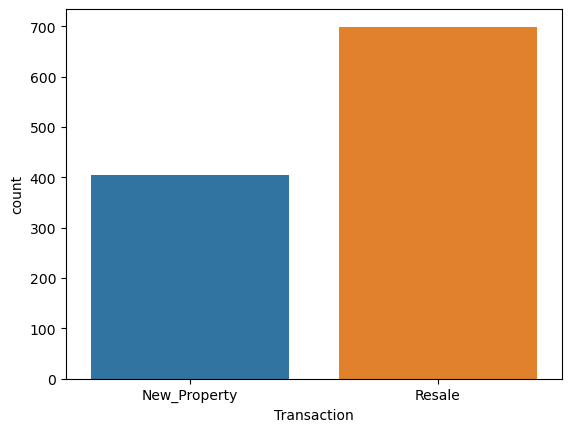

In [34]:
sns.countplot(x='Transaction',data=df)

<Axes: xlabel='Type', ylabel='count'>

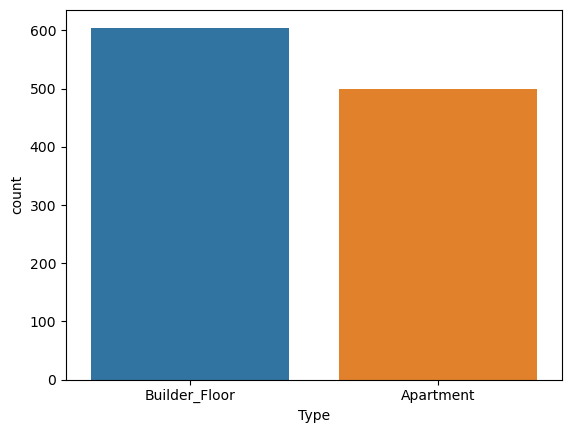

In [35]:
sns.countplot(x='Type',data=df)

<Axes: xlabel='Area', ylabel='Price'>

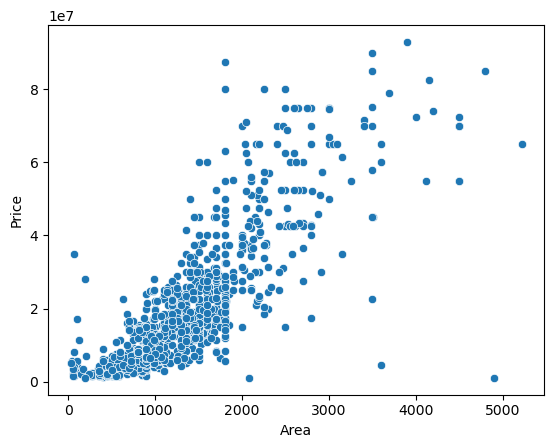

In [36]:
sns.scatterplot(x='Area',y='Price',data=df)

<Axes: xlabel='BHK', ylabel='Price'>

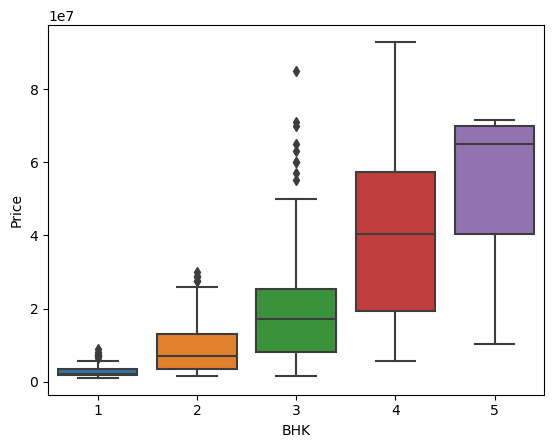

In [37]:
sns.boxplot(x='BHK',y='Price',data=df)

<Axes: xlabel='Bathroom', ylabel='Price'>

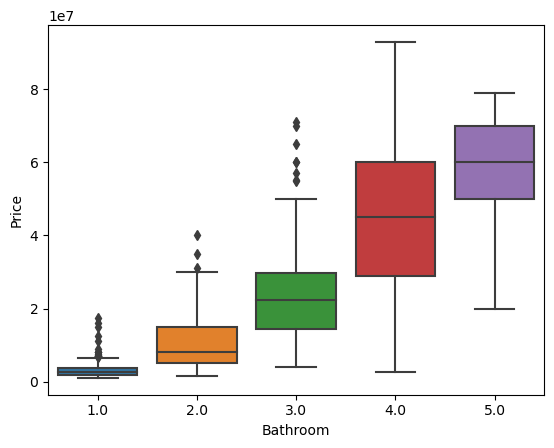

In [38]:
sns.boxplot(x='Bathroom',y='Price',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

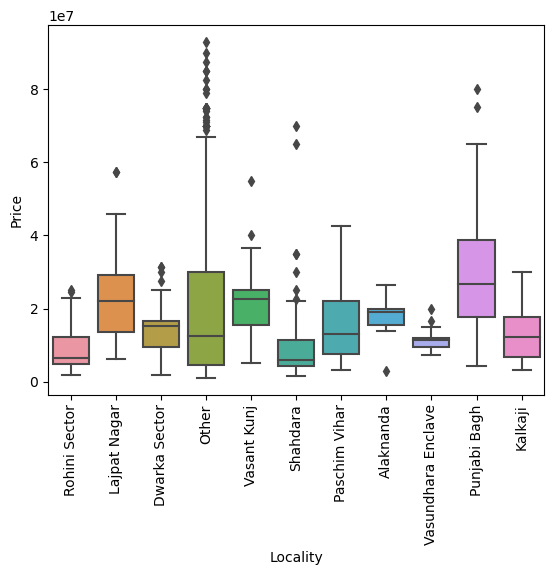

In [39]:
sns.boxplot(x='Locality',y='Price',data=df)
plt.xticks(rotation=90)

In [40]:
df['Furnishing'] = df['Furnishing'].map({'Semi-Furnished':2, 'Furnished':1, 'Unfurnished':0})

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['Locality','Status','Transaction','Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i,df[i].unique())

Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


In [42]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing       int64
Locality         int32
Parking        float64
Price            int64
Status           int32
Transaction      int32
Type             int32
Per_Sqft       float64
dtype: object

In [43]:
import warnings
warnings.filterwarnings('ignore')

Area
1.4794213217889274


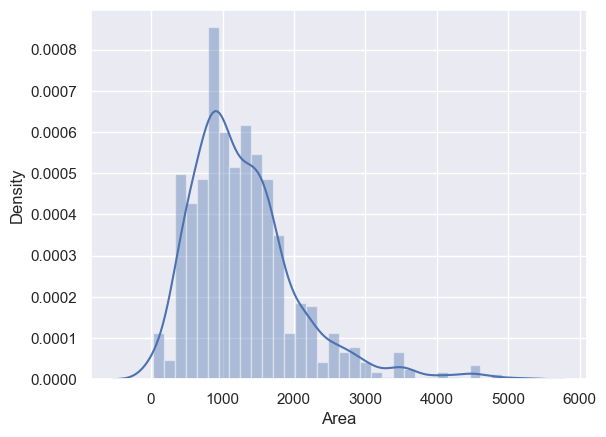

BHK
-0.069239523403076


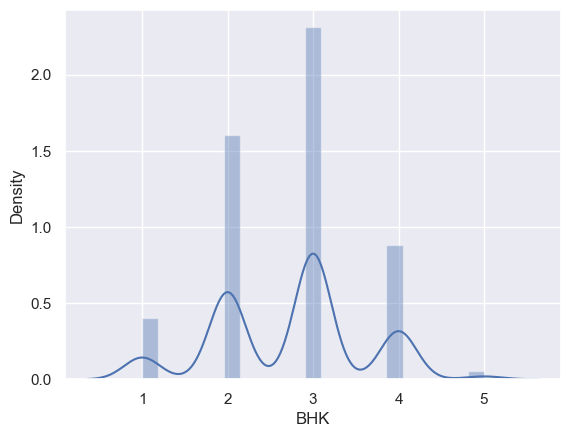

Bathroom
0.6476818721693067


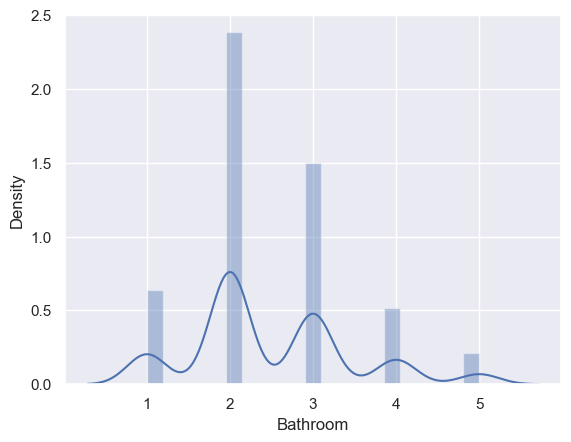

Furnishing
-0.609898787584339


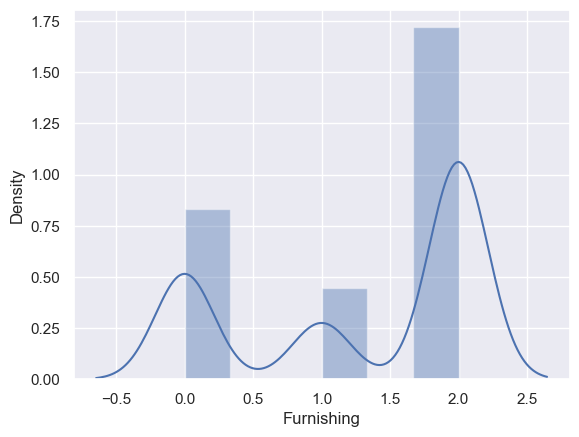

Locality
0.6723718567969174


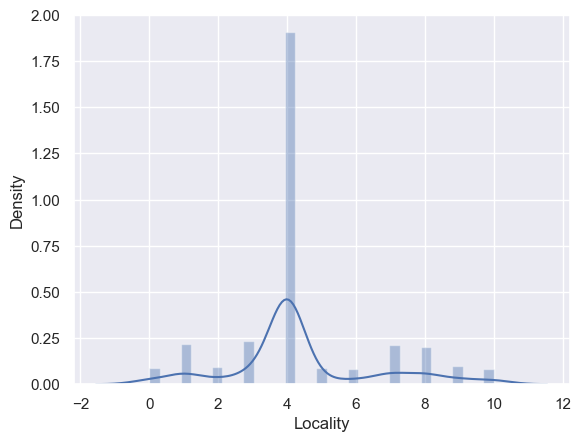

Parking
3.106260237598095


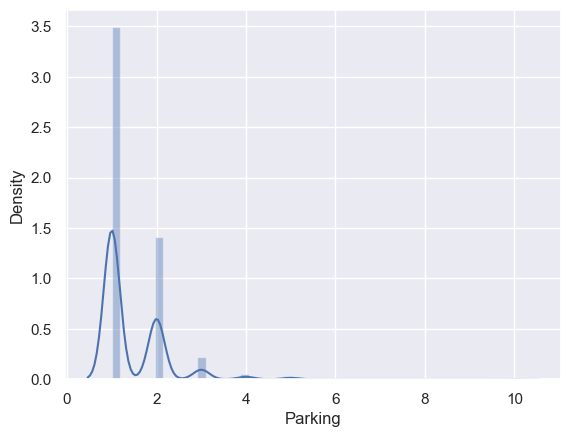

Price
1.635185607802418


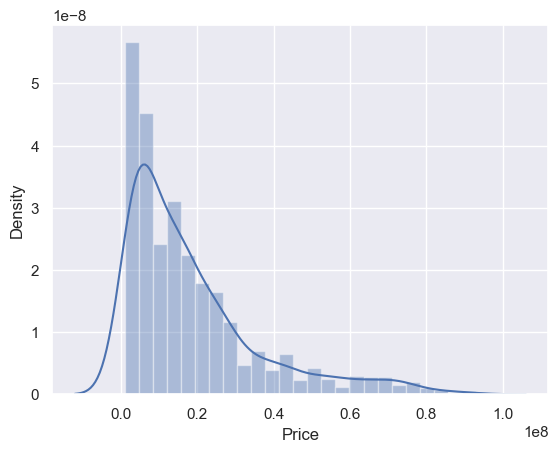

Status
-4.094840757439721


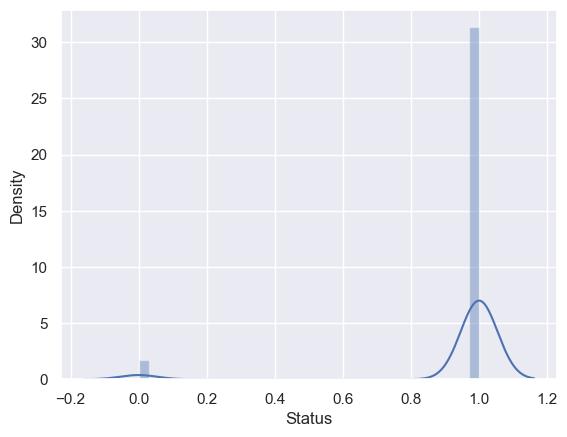

Transaction
-0.5525622748223289


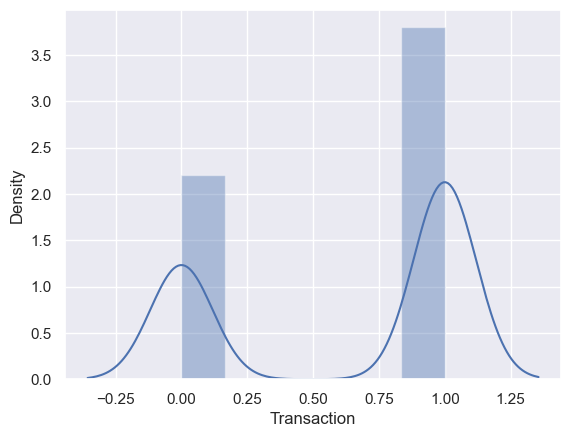

Type
-0.1929202895735722


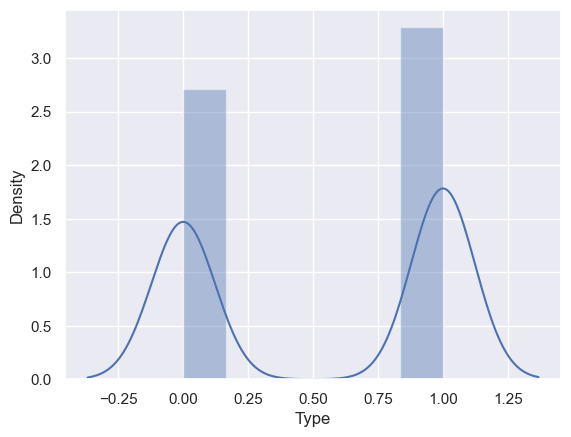

Per_Sqft
2.063638837253928


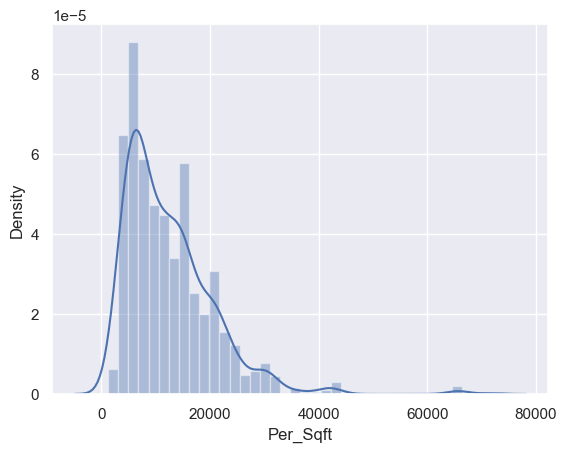

In [44]:
sns.set(font_scale=1)
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<Axes: >

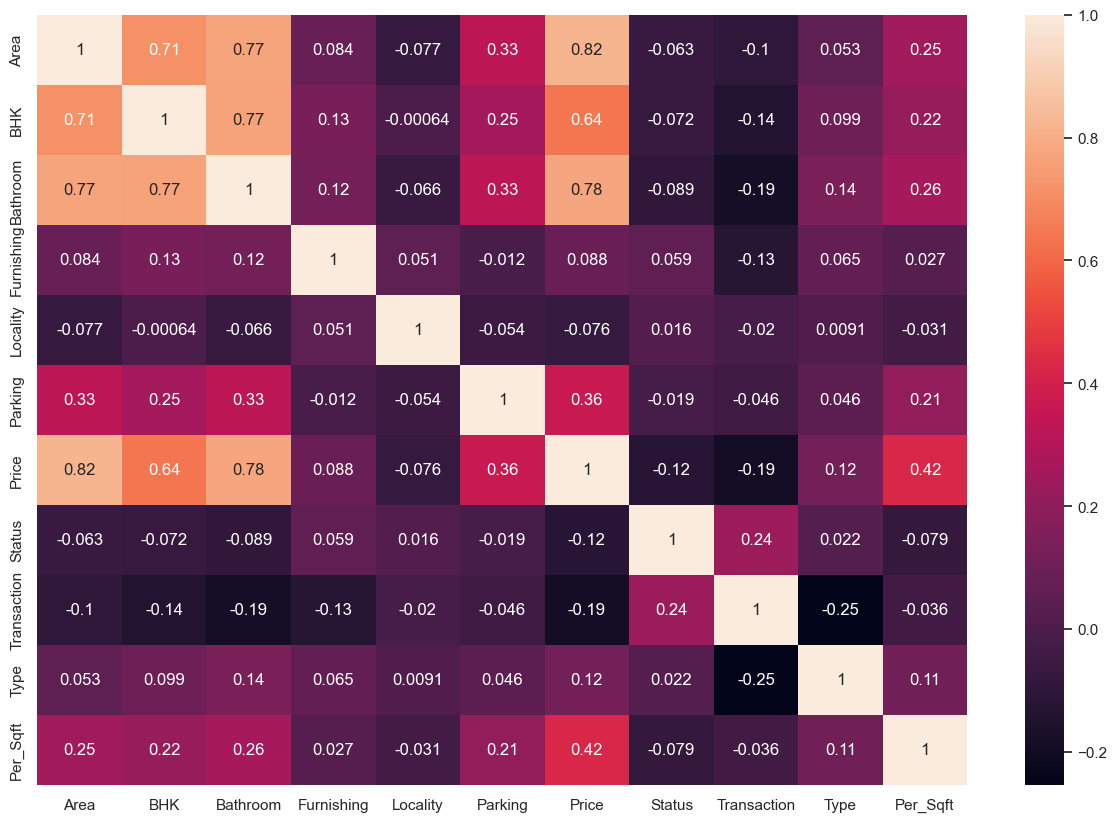

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### From the exploratory data analysis, we can conclude that the following features are important for predicting the price of a house in Delhi:
### 1.Area
### 2.BHK
### 3.Locality
